<a href="https://colab.research.google.com/github/Petegichana/Machine-Learning-Algorithms/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#CNN is commomńly used for image and video recognition systems. recognises patterns and features in an image or video
#cnn is used in face recognition, NLP. Medical image analysis,autonomous vehicles, recommender systems

In [30]:
import numpy as np #images will be represented to matrix using numpy 
import matplotlib.pyplot as plt
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import datasets, layers, models

In [31]:
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.cifar10.load_data()


In [32]:
#step 1: 
#pixels -> 16x16 ,we want to convert 256 to a range of 0 to 1
training_images, testing_images = training_images/255, testing_images/255

In [33]:
#step 2:
#specifying the classes
class_names = ['Plane','Car','Bird','Cat', 'Deer','Dog','Frog','Horse','Sheep','Truck']

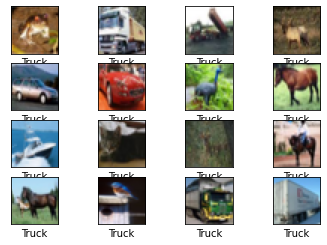

In [34]:
#step 3:
#lets visualise the first 16 training images
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[1][0]])
plt.show()

In [35]:
#DEEP LEARNING
training_images = training_images[:20000]
training_labels = training_labels[:20000]

testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]



In [36]:
#designing the neural network
#sequencial, feature map, filter_size, activation, MaxPooling

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32, 3)))#feeding the image inputs to the model
model.add(layers.MaxPool2D((2,2)))#applying the maxpooling to the feature maps (reduce dimentions)

#HIdden layers
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())#Displaying the features on a single column neurons

#applying the artificial neural network
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#differentiate between softmax, sigmoid


In [37]:
#visualize the neural network
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, title= 'CIFAR_10 Image Classifier', filename='cnn.gv')

In [41]:
#model commpilation
#optimizer, loss, metrics

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
#mmodel training by fitting the training data
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 [==============================] - 36s 54ms/step - loss: 1.7431 - accuracy: 0.3460 - val_loss: 1.4837 - val_accuracy: 0.4525
Epoch 2/10
625/625 [==============================] - 34s 54ms/step - loss: 1.3878 - accuracy: 0.4998 - val_loss: 1.3328 - val_accuracy: 0.5282
Epoch 3/10
625/625 [==============================] - 33s 53ms/step - loss: 1.2394 - accuracy: 0.5559 - val_loss: 1.2012 - val_accuracy: 0.5680
Epoch 4/10
625/625 [==============================] - 34s 54ms/step - loss: 1.1267 - accuracy: 0.6010 - val_loss: 1.1503 - val_accuracy: 0.5947
Epoch 5/10
625/625 [==============================] - 33s 53ms/step - loss: 1.0434 - accuracy: 0.6309 - val_loss: 1.0924 - val_accuracy: 0.6112
Epoch 6/10
625/625 [==============================] - 35s 55ms/step - loss: 0.9623 - accuracy: 0.6632 - val_loss: 1.0733 - val_accuracy: 0.6220
Epoch 7/10
625/625 [==============================] - 33s 53ms/step - loss: 0.9093 - accuracy: 0.6828 - val_loss: 1.0518 - val_accuracy:

In [43]:
#evaluate
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f'Loss is {loss}')
print(f'Accuracy is {accuracy}')

125/125 [==============================] - 2s 14ms/step - loss: 1.0420 - accuracy: 0.6467
Loss is 1.0419822931289673
Accuracy is 0.6467499732971191


In [44]:
#saving the model instance
model.save('image_classifier.models')

In [45]:
#prediction
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


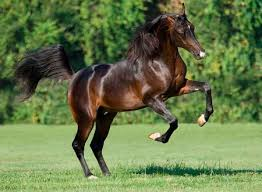

In [53]:
#display a testing image
import glob
from IPython.display import Image, display
for image in glob.glob("/hourse.jpg"):
           display(Image(filename= image))

In [54]:
from keras.saving.legacy.save import load_model
#load the model
model = load_model('image_classifier.models')

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


image_path ="/hourse.jpg"
image = load_img(image_path, target_size = (32,32, 3))

In [55]:
converted_image = img_to_array(image)
#rescale
converted_image = converted_image/255
converted_image = converted_image.reshape(32,32, 3)

In [58]:
#prediction
prediction = model.predict(np.array([converted_image]))
print(prediction)

index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 29ms/step
[[1.4740505e-04 7.7846831e-05 1.7254015e-02 3.0787243e-03 1.0857726e-01
  2.6025239e-03 1.1196237e-01 7.5623554e-01 3.1947024e-05 3.2402771e-05]]
Prediction is Horse
